# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

sns.set_theme()

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [2]:
raw_data = pd.read_csv('Categorical.csv')
raw_data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


Remove the duplicate index column from the dataset. 

In [3]:
# ?

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [4]:
def get_continent_id(continent):
    return np.nonzero(raw_data['continent'].unique() == continent)[0][0]

data_mapped = raw_data.copy()
data_mapped['continent'] = data_mapped['continent'].map(get_continent_id)
data_mapped.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,3


## Select the features

In [5]:
x = data_mapped.iloc[:, -1:]
x

,continent
0,0
1,1
2,2
3,0
4,3
...,...
236,5
237,1
238,2
239,2


## Clustering

Use 4 clusters initially.

In [6]:
k = 4
kmeans = KMeans(k)
kmeans.fit(x)
clusters = kmeans.fit_predict(x)
clusters

c:\Users\diogo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\diogo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 3, 1, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 3, 0, 3, 3,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 3, 3, 0, 0, 1, 3, 3,
       3, 3, 2, 0, 3, 3, 1, 1, 1, 1, 1, 1, 0, 0, 3, 1, 0, 1, 3, 0, 3, 3,
       0, 0, 3, 0, 2, 0, 0, 0, 2, 3, 0, 1, 0, 3, 3, 3, 3, 3, 0, 1, 1, 1,
       2, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 3, 1, 1, 2, 1, 1, 0, 1, 1, 1, 3, 3, 1, 0, 1, 3, 0, 0, 0,
       1, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 0, 1, 0, 1, 2, 3, 3, 1, 2, 3, 1,
       3, 2, 3, 2, 3, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1,
       1, 0, 0, 1, 2, 1, 0, 0, 3, 3, 1, 3, 3, 3, 1, 2, 2, 2, 3, 1, 0, 3,
       3, 1, 0, 3, 0, 0, 0, 0, 3, 1, 2, 1, 1, 3, 3, 1, 1, 1, 1, 2, 1, 3,
       1, 1, 3, 3, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 2, 2, 1, 3, 3, 3])

## Clustering results

In [7]:
data_w_clusters = data_mapped.copy()
data_w_clusters['Cluster'] = clusters
data_w_clusters.head()

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,0,1
1,Afghanistan,66.004734,33.835231,1,1
2,Angola,17.537368,-12.293361,2,3
3,Anguilla,-63.064989,18.223959,0,1
4,Albania,20.049834,41.142450,3,0


## Plot the data

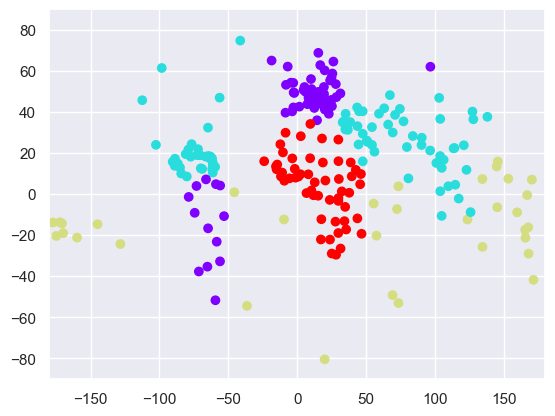

In [8]:
plt.scatter(data_w_clusters['Longitude'], data_w_clusters['Latitude'], c=data_w_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.

### 3 Clusters
3 Clusters although it separates the continents  it doesn't give much insight since it depends on the order in which the countries appear during the 'map' function.
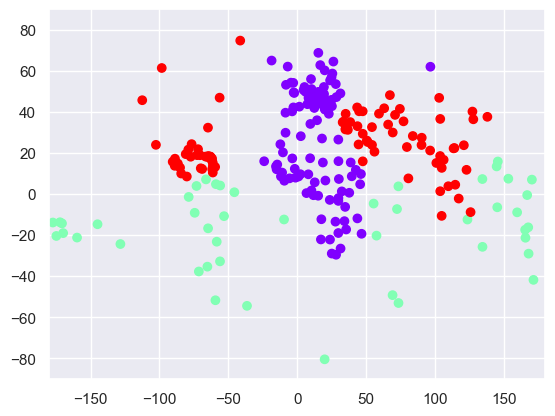
### 7 Clusters
For 7 clusters we would expect to see the 7 continents, although in this dataset there are 8 due to the addition of 'Seven seas (open ocean)'
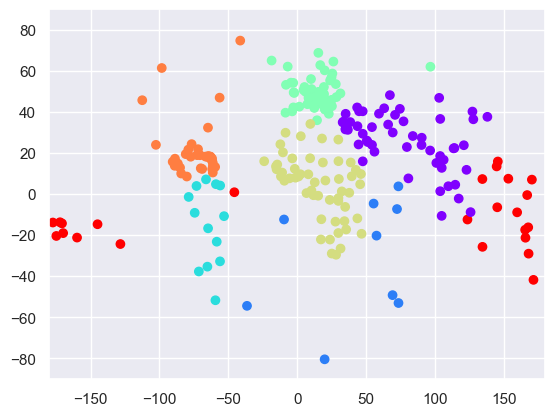
### 8 Clusters
For 8 clusters we can see all the correct separation of continents, although there is 1 African continent close to South America that probably shouldn't be there. After running 8 clusters multiple times I noticed that there where slight differences and that the [-50, 0] and [-45, -55] regions sometimes where added to a different cluster, this is due to the KMeans seed.  
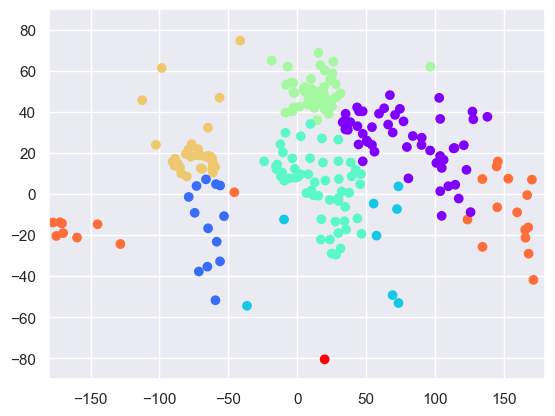